# Part II - Flights
## by Ghadeer

## Investigation Overview


> The goal of this notebook is to explore flight delay patterns in U.S. domestic flights for January 2025, focusing primarily on arrival delays. This analysis aims to identify which operational factors contribute to delays, highlight variability across flights, and examine patterns that could inform airline and passenger decision-making. The analysis progresses from univariate to bivariate and multivariate visualizations to build a clear, evidence-based narrative around flight punctuality.

## Dataset Overview and Executive Summary

> This dataset contains U.S. domestic flight records from January 2025, sourced from the Bureau of Transportation Statistics (BTS) On-Time Performance database. Each row represents an individual flight and includes variables such as arrival delay, scheduled departure time, flight distance, and origin/destination airports.

>The dataset was limited to one month to keep the analysis manageable while still capturing meaningful variation in flight delays. The primary focus of this analysis is arrival delay, supported by features such as flight distance, scheduled departure time, and a derived categorical delay status.

## Key Insights

### Most flights arrive on time or slightly early.
>Univariate analysis shows the majority of flights have minimal arrival delays, but a small proportion of flights experience significant delays, creating a long right-skewed distribution.

### Delay severity varies by operational characteristics
>Bivariate analysis revealed that both short- and long-distance flights can be delayed, and the distribution of delays varies across different times of day. This indicates that distance alone is not a strong predictor of delays.

### Interactions between features reveal deeper patterns
>Multivariate exploration using facets and scatter plots demonstrated that severe delays are concentrated in the “delayed” group across all distances and operational contexts. Arrival delays are influenced by multiple factors simultaneously rather than any single variable.

### Derived delay status provides actionable insights
>Categorizing flights as “On Time / Early” or “Delayed (15+ min)” helps highlight which flights contribute most to overall delay patterns, offering a clear metric for operational performance.


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
flights = pd.read_csv("T_ONTIME_REPORTING.csv")

## (Visualization 1)

> Write a comment about your visualization here.  Make sure your visualizations are polished!

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations shoould be less than 50% of the number of visualizations in the exploratory analysis. Generally 3-5 visualizations suffice.


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots shown are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

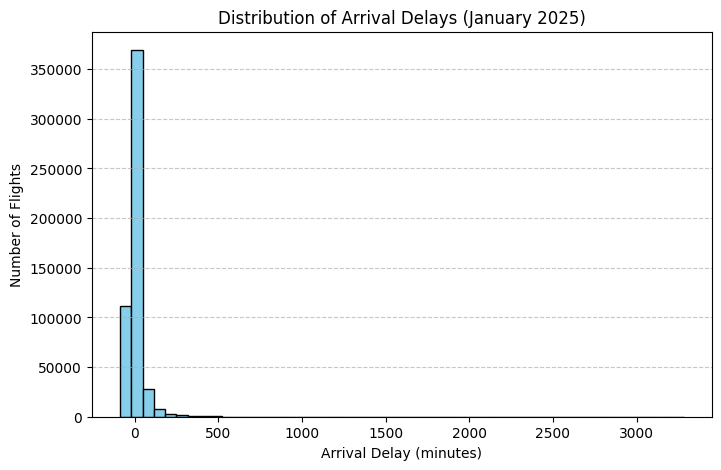

In [5]:
plt.figure(figsize=(8, 5))
plt.hist(flights['ARR_DELAY'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Distribution of Arrival Delays (January 2025)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This histogram reveals that most flights arrive on time or slightly early, with arrival delays clustered around zero minutes. A smaller proportion of flights experience significant delays, creating a right-skewed distribution. This visualization establishes the baseline pattern of arrival delays for the dataset.

## (Visualization 2)

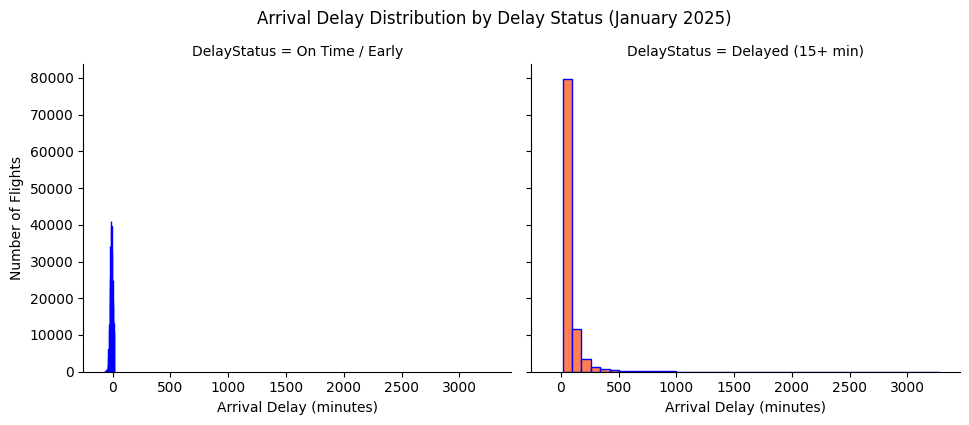

In [11]:
df_delay = flights[flights['ARR_DEL15'].notna()].copy()

df_delay['DelayStatus'] = df_delay['ARR_DEL15'].map({
    0: 'On Time / Early',
    1: 'Delayed (15+ min)'
})
g = sns.FacetGrid(
   df_delay,
    col='DelayStatus',
    height=4,
    aspect=1.2,
    sharex=True,
    sharey=True
)
g.map(plt.hist, 'ARR_DELAY', bins=40, color='coral', edgecolor='blue')
g.set_axis_labels('Arrival Delay (minutes)', 'Number of Flights')
g.fig.suptitle('Arrival Delay Distribution by Delay Status (January 2025)', y=1.05)
plt.show()

Faceting the arrival delay distribution by delay status shows that on-time flights are tightly clustered near zero, while delayed flights show a wide spread and long right tail. Comparing across hours of the day indicates that delays can occur at all times, suggesting that departure hour alone is not a primary determinant of delays.

## (Visualization 3)

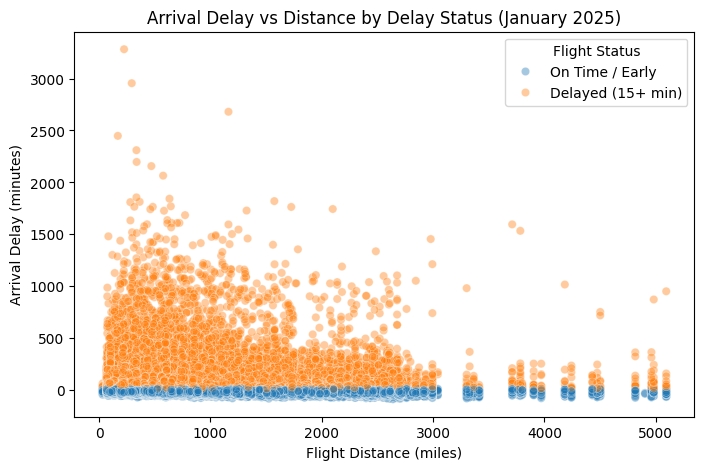

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_delay,
    x='DISTANCE',
    y='ARR_DELAY',
    hue='DelayStatus',
    alpha=0.4
)

plt.xlabel('Flight Distance (miles)')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Arrival Delay vs Distance by Delay Status (January 2025)')
plt.legend(title='Flight Status')
plt.show()

The scatter plot demonstrates that delayed flights (colored differently) occur across all flight distances. While extreme delays appear at both short and long distances, the majority of flights cluster near zero delay regardless of distance. This confirms that distance alone is not a strong predictor of delay severity, but delay status highlights flights that contribute most to overall delays.